# Project data exploration II -
## plotting categorical plot and incorporating other data

---


We will continue to work with the dataset that your group is consider for the term project. In this notebook we will create some plot using the Seaborn module and the different categorical plots we practiced in class. Additionally, we will explore the idea of working with other datasets in addition to the one you originally selected to strengthen your argument.

Group name:  Group 8

Created by NAMES (SJSU IDs):

Eden Kidane(017234854), Salma Ibrahim (013934479), Jacob Timoteo (017676672)


Last updated: 10/12/25  

In [1]:
import kagglehub
import pandas as pd
import random
import glob

# Download the dataset
path = kagglehub.dataset_download("sobhanmoosavi/us-accidents")
csv_file = glob.glob(f'{path}/*.csv')[0]

print(f"Reading file in chunks: {csv_file}")

# First, count total rows
total_rows = sum(1 for _ in open(csv_file)) - 1  # subtract header

# Calculate skip probability to get ~500k rows
sample_size = 500000
skip_prob = 1 - (sample_size / total_rows)

print(f"Total rows: {total_rows:,}")
print(f"Sampling {sample_size:,} rows...")

# Read with random sampling
df = pd.read_csv(
    csv_file,
    skiprows=lambda i: i > 0 and random.random() < skip_prob
)

# If we got more/less than exactly 500k, adjust
if len(df) > sample_size:
    df = df.sample(n=sample_size, random_state=42)

df.to_csv('us_accidents_sample_500k.csv', index=False)
print(f"Saved {len(df):,} rows to us_accidents_sample_500k.csv")

Reading file in chunks: C:\Users\jacob\.cache\kagglehub\datasets\sobhanmoosavi\us-accidents\versions\13\US_Accidents_March23.csv
Total rows: 7,728,394
Sampling 500,000 rows...
Saved 500,000 rows to us_accidents_sample_500k.csv


In [2]:

sample= pd.read_csv('us_accidents_sample_500k.csv')
sample.head(10)
sample


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-7234321,Source1,2,2020-01-22 15:31:00,2020-01-22 16:22:52,34.030662,-117.610875,34.030662,-117.610875,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
1,A-7019284,Source1,2,2020-05-09 12:57:00,2020-05-09 15:00:00,38.567320,-112.256150,38.567320,-112.256150,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
2,A-6601279,Source1,2,2020-12-21 04:54:32,2020-12-21 06:55:39,45.288567,-92.981415,45.287147,-92.982191,0.105,...,False,False,False,False,False,False,Night,Night,Night,Night
3,A-7697858,Source1,2,2017-08-18 10:42:10,2017-08-18 16:42:10,33.893780,-118.047361,33.893250,-118.046380,0.067,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-1350656,Source2,2,2020-10-21 10:53:04,2020-10-21 11:22:53,34.818550,-81.635628,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,A-2760119,Source2,3,2018-06-13 04:53:29,2018-06-13 05:23:10,34.069626,-117.797287,NaN,NaN,0.290,...,False,False,False,False,False,False,Night,Night,Day,Day
499996,A-4749028,Source1,2,2022-02-09 18:12:28,2022-02-09 19:32:14,36.644354,-87.167641,36.644930,-87.167751,0.040,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
499997,A-4636675,Source1,2,2022-04-02 19:33:07,2022-04-02 20:49:21,27.982637,-82.721641,27.982631,-82.721229,0.025,...,False,False,False,False,False,False,Day,Day,Day,Day
499998,A-1289679,Source2,3,2020-09-08 07:46:16,2020-09-08 09:23:44,37.392471,-77.422897,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day


### Q1: How clean is your data?  
Do you have formatting concerns, null values, inconsistent data, etc... If so, explain what cleaning or reformating you have to do and how you plan to approach this cleaning steps.


---
Our dataset is massive so we are getting a random sample of it first so we can work with it. As everything crashes before we can look at it, we are first getting skipping the header then counting how many rows there are in the original csv then it reads with random sampling to get about 500,000 rows so that we get a csv that doesn't crash. We also plan on dropping some columns that are not needed that have a lot of missing data. For some missing data using mean or median to fill it in.
For some others fill in with Unknown or mode. And dropping rows if important columns features are missing from the row.
If we end up using any of the time featurs we may convert them to datetime types instead of leaving them as object types. And finally for weather conditions there seem to be a lot of text duplicates (eg. 'windy','Windy','rainy/windy') and we will unify the categories and may add a column if needed due to the volume of values the feature has.




In [3]:
#non null count are not the same
sample.info()
sample.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     500000 non-null  object 
 1   Source                 500000 non-null  object 
 2   Severity               500000 non-null  int64  
 3   Start_Time             500000 non-null  object 
 4   End_Time               500000 non-null  object 
 5   Start_Lat              500000 non-null  float64
 6   Start_Lng              500000 non-null  float64
 7   End_Lat                279697 non-null  float64
 8   End_Lng                279697 non-null  float64
 9   Distance(mi)           500000 non-null  float64
 10  Description            500000 non-null  object 
 11  Street                 499272 non-null  object 
 12  City                   499982 non-null  object 
 13  County                 500000 non-null  object 
 14  State                  500000 non-nu

ID                            0
Source                        0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                  220303
End_Lng                  220303
Distance(mi)                  0
Description                   0
Street                      728
City                         18
County                        0
State                         0
Zipcode                     118
Country                       0
Timezone                    503
Airport_Code               1480
Weather_Timestamp          7686
Temperature(F)            10541
Wind_Chill(F)            129091
Humidity(%)               11248
Pressure(in)               8970
Visibility(mi)            11342
Wind_Direction            11134
Wind_Speed(mph)           36844
Precipitation(in)        142740
Weather_Condition         11164
Amenity                       0
Bump                          0
Crossing

### Q2: Create a categorical plot
Come up with a unique question that can be answer using a categorical plot from the sns module

How does accident severity vary by weather conditions?

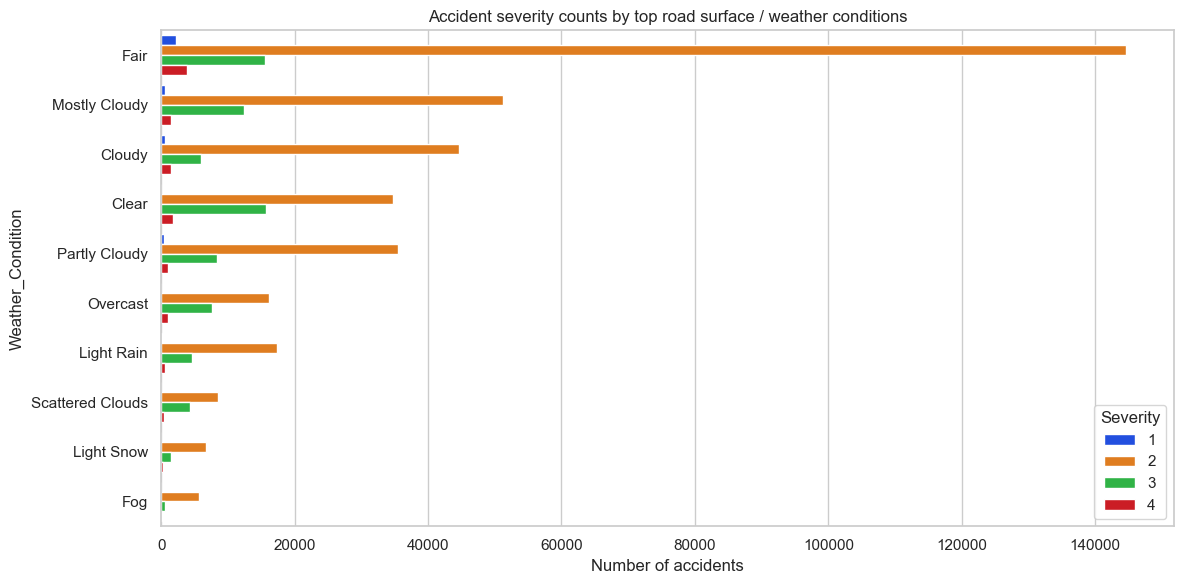

In [4]:
# Your code here . . .
import seaborn as sns
import matplotlib.pyplot as plt
top_n = 10
top_conditions = sample['Weather_Condition'].value_counts().nlargest(top_n).index.tolist()
subset = sample[sample['Weather_Condition'].isin(top_conditions)]

sns.set(style="whitegrid")
plt.figure(figsize=(12,6))
ax = sns.countplot(
    data=subset,
    y='Weather_Condition',
    hue='Severity',
    order=top_conditions,
    palette='bright'
)

plt.title('Accident severity counts by top road surface / weather conditions')
plt.xlabel('Number of accidents')
plt.ylabel('Weather_Condition')
plt.legend(title='Severity'),
plt.tight_layout()
plt.show()

### Q3: Come up with a another unique question. This question must use map() or apply()

####Question: Can we visualize how accident severity by time of day using the `Sunrise_Sunset`?(Day vs. Night accident)

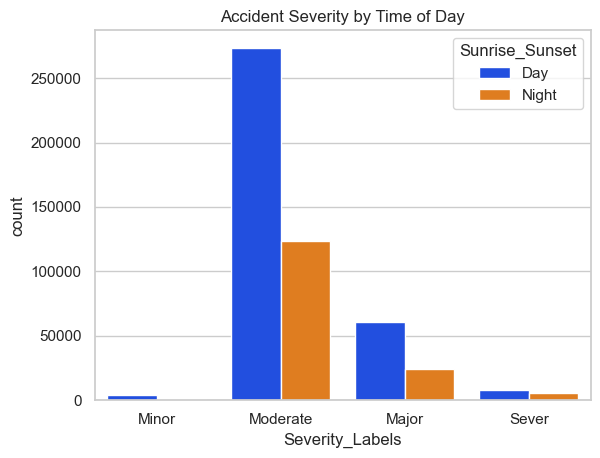

There are more accidents during the day than there are during the night. 
This means higher daytime traffic may lead to more frequent accidents


In [5]:
# Your code here . . .
import seaborn as sns
import matplotlib.pyplot as plt

sample['Sunrise_Sunset'].value_counts() #yay!! already clean, no other vals except 'Day' and 'Night'

sample['Severity'].value_counts() #clean too using map() here

#Severity column discription from kaggle
#Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic
 #(i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).

Severity_Labels = {1:'Minor',
                   2:'Moderate',
                   3:'Major',
                   4:'Sever'
                   }

sample['Severity_Labels'] = sample['Severity'].map(Severity_Labels)

sns.countplot(data=sample,
              x='Severity_Labels',
              hue='Sunrise_Sunset',
              order=['Minor','Moderate','Major','Sever'],
              palette='bright'
              )
plt.title('Accident Severity by Time of Day')
plt.show()
print('There are more accidents during the day than there are during the night. \nThis means higher daytime traffic may lead to more frequent accidents')



### Q4: Create an interactive plot (skip for version 1)
Create an interactive plot using plotly. Your plot can be a previously asked question or a new question, however explain how this interaction strengthen what you want to communicate with your audience.

In [6]:
# Your code here . . . Have not learned interactive plots yet
import plotly.express as px




Severity_Labels = {1:'Minor',
                   2:'Moderate',
                   3:'Major',
                   4:'Sever'
                  }

sample['Severity_Labels'] = sample['Severity'].map(Severity_Labels)

#count accidents for day and night for all severity levels
df_count = sample.groupby(['Sunrise_Sunset', 'Severity_Labels']).size().reset_index(name='Count')

fig = px.bar(df_count,
             x='Severity_Labels',
             y='Count',
             color='Sunrise_Sunset',
             category_orders={'Severity_Labels': ['Minor', 'Moderate', 'Major', 'Sever']},
             title='Accident Severity by Time of Day'
            )
fig.update_layout(xaxis_title='Severity', yaxis_title='Number of Accidents',barmode='group')
fig.show()

The interactive plot strengthens communication with the audience by allowing viewers to explor accident patterns by hovering, and comparing the categories directly. This interactive plot makes accedent severity between day and night more clear and engaging by being able to get the count.

## Q5: Additional datasets and data processing
For the questions below you do not need to do the plotting if you have not found another complementary dataset. However, write the psuedocode of how you could go about answering the questions and sketches of what your visualization might be. Answer the following:

What additional datasets would you need to find or create to help strengthen your data?
How would you combine the dataset?
Do you need to reshape your data and how could you go about it?

# Useful datasets:  
1. Local weather station historical hourly data
    * Weather at the time of crash could help explain severity   
2. Traffic volume
    * Congestion and traffic density correlate with accident frequency/severity   
3. Road network / speed limits / lane counts / road classification (state DOT shapefiles)
    * Road type and speed limit could affect severity   
4. Census tract demographics or population density
    * Ubran/rural differences   
5. Holidays/events calendar
    * Helps distinguish holiday related traffic patterns   
6. Police report database
    * Validate severity labels   

# How to combine:  
* Join on time + location
    * Convert `Start_Time` to either UTC or local timezone. Use a rounded lat/long to match grid
    * For weather: join by nearest weather station and the closest hourly observation to `Start_Time`   
* Reshape / Aggregation
  * Resample hourly/day to merge with hourly weather/traffic.
  * Aggregate to county/day for macro analysis (e.g., accidents per county per day vs rainfall).


In [7]:
# PSEUDOCODE
# 1. load accidents -> df_acc
# 2. load weather hourly -> df_weather
# 3. convert Start_Time to timezone-aware datetime
# 4. for each accident: find nearest weather station (or cluster) within 50km
# 5. join the weather obs at the nearest hour
# 6. create features: precip_flag, temp_below_zero, heavy_rain, visibility_low
# 7. now analyze severity ~ weather features (group, logistic regression, or plots)
